In [1]:
#Importación de paquetes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Lectura y almacenamiento de la Base de Datos 1
data1= pd.read_excel('/Users/mariabolanosgutierrez/Downloads/Data_Primas_Siniestros.xlsx')
data1

,Año,Mes,Aseguradora,Clasificación,Categoría,Monto
0,2015,Enero,INS,Primas,Generales,25017.388756
1,2015,Enero,INS,Primas,Personales,40829.815988
2,2015,Enero,INS,Siniestros,Generales,9310.093825
3,2015,Enero,INS,Siniestros,Personales,11570.439116
4,2015,Enero,MAGIST,Primas,Personales,70.016074
...,...,...,...,...,...,...
3767,2023,Febrero,OCEANICA,Siniestros,Generales,770.607336
3768,2023,Febrero,LAFISE,Primas,Generales,1814.860558
3769,2023,Febrero,LAFISE,Primas,Personales,4.981774
3770,2023,Febrero,LAFISE,Siniestros,Generales,615.050863


In [2]:
#Filtrar la base de datos por delimitacion del tiempo
dataFiltrada = data1[data1['Año'] >= 2019]
dataFiltrada

,Año,Mes,Aseguradora,Clasificación,Categoría,Monto
1822,2019,Enero,INS,Primas,Generales,81181.719533
1823,2019,Enero,INS,Primas,Personales,63141.613458
1826,2019,Enero,MAGIST,Primas,Personales,263.079431
1828,2019,Enero,MAPFRE,Primas,Generales,531.588115
1829,2019,Enero,MAPFRE,Primas,Personales,241.472441
...,...,...,...,...,...,...
3762,2023,Febrero,SAGICOR,Primas,Generales,381.002673
3763,2023,Febrero,SAGICOR,Primas,Personales,1719.922057
3766,2023,Febrero,OCEANICA,Primas,Generales,2526.247114
3768,2023,Febrero,LAFISE,Primas,Generales,1814.860558


In [5]:
# Filtrar los datos para seguros personales y tomar las primas por aseguradora y categoría
primas_personales = data1.loc[(data1['Categoría'] == 'Personales') & (data1['Clasificación'] == 'Primas') & (data1['Año'] >= 2019), 'Monto']

# Filtrar los datos para seguros generales y tomar las primas por aseguradora y categoría
primas_generales = data1.loc[(data1['Categoría'] == 'Generales') & (data1['Clasificación'] == 'Primas') & (data1['Año'] >= 2019), 'Monto']


In [10]:
# Calcular la suma de los montos por aseguradora para seguros personales y seguros generales
participacion_personales = primas_personales.groupby(data1['Aseguradora']).sum()
participacion_generales = primas_generales.groupby(data1['Aseguradora']).sum()

# Calcular los porcentajes de participación
participacion_personales_porcentaje = participacion_personales * 100 / participacion_personales.sum()
participacion_generales_porcentaje = participacion_generales * 100 / participacion_generales.sum()

Aseguradora
ADISA          4.188007
ASSA           5.781927
BMI            2.378459
DAVIVIENDA     0.171481
INS           63.807115
LAFISE         0.000080
MAGIST         3.020751
MAPFRE         2.811001
PANAM         14.497895
SAGICOR        1.921261
TRIPLE-S       1.422023
Name: Monto, dtype: float64

In [15]:
# Ordenar los porcentajes de mayor a menor
participacion_personales_ordenado = participacion_personales_porcentaje.sort_values(ascending=True)
participacion_generales_ordenado = participacion_generales_porcentaje.sort_values(ascending=True)

In [16]:
# Definir el umbral para agrupar en "Otros"
umbralP = 5
umbralG = 3.5
#NOTA: se hace a partir de la información que despliega el porcentaje de participación de cada categoría con el fin de delimitar a las tres aseguradoras con mayor participación en cada categoría.

In [17]:
# Crear una nueva Serie con los porcentajes agrupados y ordenados
participacion_personales_otros = participacion_personales_ordenado[participacion_personales_ordenado >= umbralP]
participacion_personales_otros['Otros'] = participacion_personales_ordenado[participacion_personales_ordenado < umbralP].sum()
participacion_personales_otros = participacion_personales_otros.sort_values(ascending=True)

participacion_generales_otros = participacion_generales_ordenado[participacion_generales_ordenado >= umbralG]
participacion_generales_otros['Otros'] = participacion_generales_ordenado[participacion_generales_ordenado < umbralG].sum()
participacion_generales_otros = participacion_generales_otros.sort_values(ascending=True)

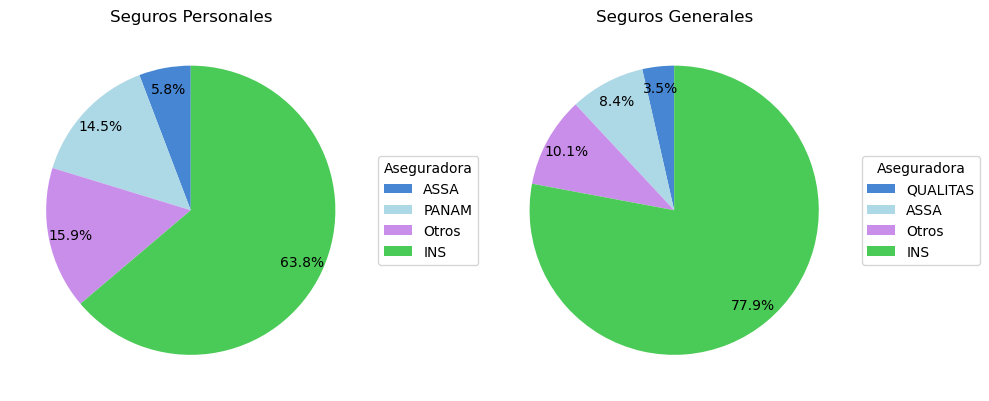

In [20]:
# Obtener los colores por aseguradora
colores = ['#4686D2', '#ADD8E6', '#C98EEA', '#4ACA56']

# Configurar la figura y los ejes del gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico para seguros personales
ax1.set_title('Seguros Personales')
wedges, labels, textprops = ax1.pie(participacion_personales_otros, startangle=90, autopct='%1.1f%%', pctdistance=0.85, colors=colores)
ax1.set_aspect('equal')

# Ajustar manualmente la posición de las etiquetas
for label, wedge in zip(labels, wedges):
    theta = wedge.theta1 + (wedge.theta2 - wedge.theta1) / 2.0
    x = wedge.r * 0.85 * np.cos(np.deg2rad(theta))
    y = wedge.r * 0.85 * np.sin(np.deg2rad(theta))
    label.set_position((x, y))

ax1.legend(wedges, participacion_personales_otros.index, title='Aseguradora', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Gráfico para seguros generales
ax2.set_title('Seguros Generales')
wedges, labels, textprops = ax2.pie(participacion_generales_otros, startangle=90, autopct='%1.1f%%', pctdistance=0.85, colors= colores)
ax2.set_aspect('equal')

# Ajustar manualmente la posición de las etiquetas
for label, wedge in zip(labels, wedges):
    theta = wedge.theta1 + (wedge.theta2 - wedge.theta1) / 2.0
    x = wedge.r * 0.85 * np.cos(np.deg2rad(theta))
    y = wedge.r * 0.85 * np.sin(np.deg2rad(theta))
    label.set_position((x, y))

ax2.legend(wedges, participacion_generales_otros.index, title='Aseguradora', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Guardar el gráfico en formato pdf
plt.savefig('participacion.pdf', format='pdf', bbox_inches='tight')

# Mostrar el gráfico
plt.show()

In [21]:
#Tabla de estadísticas para Top Aseguradoras del Mercado de Personales:
aseguradoras_personales= ['INS', 'PANAM', 'ASSA']
dataFiltradaPersonales = dataFiltrada[(dataFiltrada['Aseguradora'].isin(aseguradoras_personales))&(dataFiltrada['Clasificación'] == 'Primas') & (dataFiltrada['Categoría'] == 'Personales')]
# Agrupar los datos filtrados por Aseguradora y obtener estadísticas
tablaPersonales_primas = dataFiltradaPersonales.groupby('Aseguradora').agg({
    'Monto': ['sum', 'mean', 'max', 'min']
})
tablaPersonales_primas= tablaPersonales_primas.round(2).rename(columns={'Monto': 'Monto de primas'})
tablaPersonales_primas

Monto de primas                                
                        sum       mean        max       min
Aseguradora                                                
ASSA              787981.37   15759.63   34081.31   2255.43
INS              8695858.19  173917.16  314126.61  58458.94
PANAM            1975824.19   39516.48   76569.49  13816.95

In [22]:
#Tabla de estadísticas para Top Aseguradoras del Mercado de Generales:
aseguradoras_generales= ['INS', 'ASSA', 'QUALITAS']
dataFiltradaGenerales = dataFiltrada[(dataFiltrada['Aseguradora'].isin(aseguradoras_generales)) &(dataFiltrada['Clasificación'] == 'Primas')& (dataFiltrada['Categoría'] == 'Generales')]
# Agrupar los datos filtrados por Aseguradora y obtener estadísticas
tablaGenerales = dataFiltradaGenerales.groupby('Aseguradora').agg({
    'Monto': ['sum', 'mean', 'max', 'min']
})
tablaGenerales= tablaGenerales.round(2).rename(columns={'Monto': 'Monto de primas'})
tablaGenerales

Monto de primas                                
                        sum       mean        max       min
Aseguradora                                                
ASSA             1102050.58   22041.01   49050.78   3922.86
INS             10224792.86  204495.86  343240.31  72283.26
QUALITAS          465011.34    9300.23   21780.21   1078.00